In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import math
import scipy
import scipy.integrate
mpl.rcParams['font.family'] = 'serif'

In [15]:
sys.path.append('05_com')

def dN(x):
    ''' Probability density function of standard normal random variable x.'''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)

def N(d):
    ''' Cumulative density function of standard normal random variable x. '''
    return scipy.integrate.quad(lambda x: dN(x), -20, d, limit=50)[0]

def d1f(St, K, t, T, r, sigma):
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2) \
          * (T - t)) / (sigma * math.sqrt(T - t))
    return d1
#
# Valuation Functions
#
def BSM_call_value(St, K, t, T, r, sigma):
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    call_value = St * N(d1) - math.exp(-r * (T - t)) * K * N(d2)
    return call_value

def BSM_put_value(St, K, t, T, r, sigma):
    put_value = BSM_call_value(St, K, t, T, r, sigma) \
           - St + math.exp(-r * (T - t)) * K
    return put_value


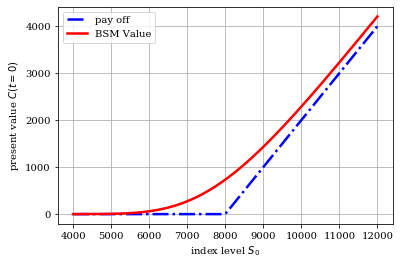

In [16]:
# Model and Option Parameters
K = 8000  # strike price
T = 1.0  # time-to-maturity
r = 0.025  # constant, risk-less short rate
vol = 0.2  # constant volatility
# Sample Data Generation
S = np.linspace(4000, 12000, 150)  # vector of index level values
payoff = np.maximum(S - K, 0)  # inner value of option
C = [BSM_call_value(S0, K, 0, T, r, vol) for S0 in S] # calculate call option values
# Graphical Output
plt.figure()
plt.plot(S, payoff, 'b-.', lw=2.5, label='pay off')  # plot inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='BSM Value') # plot option present value
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$');

#### Factors influencing PV of call option:
    - initial index level: closer to strike price more probable             for positive value
    - volatility of index: higher volatility, better for holder
    - time-to-maturity: more time, more valuable
    - interest rate: used for discounting, lower i higher value
    
#### BSM: 
$C_{0}^{∗}$ = $C^{BSM}$($S_{0}$,K,T,r,𝜎)